In [1]:
import matplotlib.pyplot as plt

C:\Users\muaa\AppData\Local\Temp\ipykernel_19176\1842730633.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit all x-axis labels


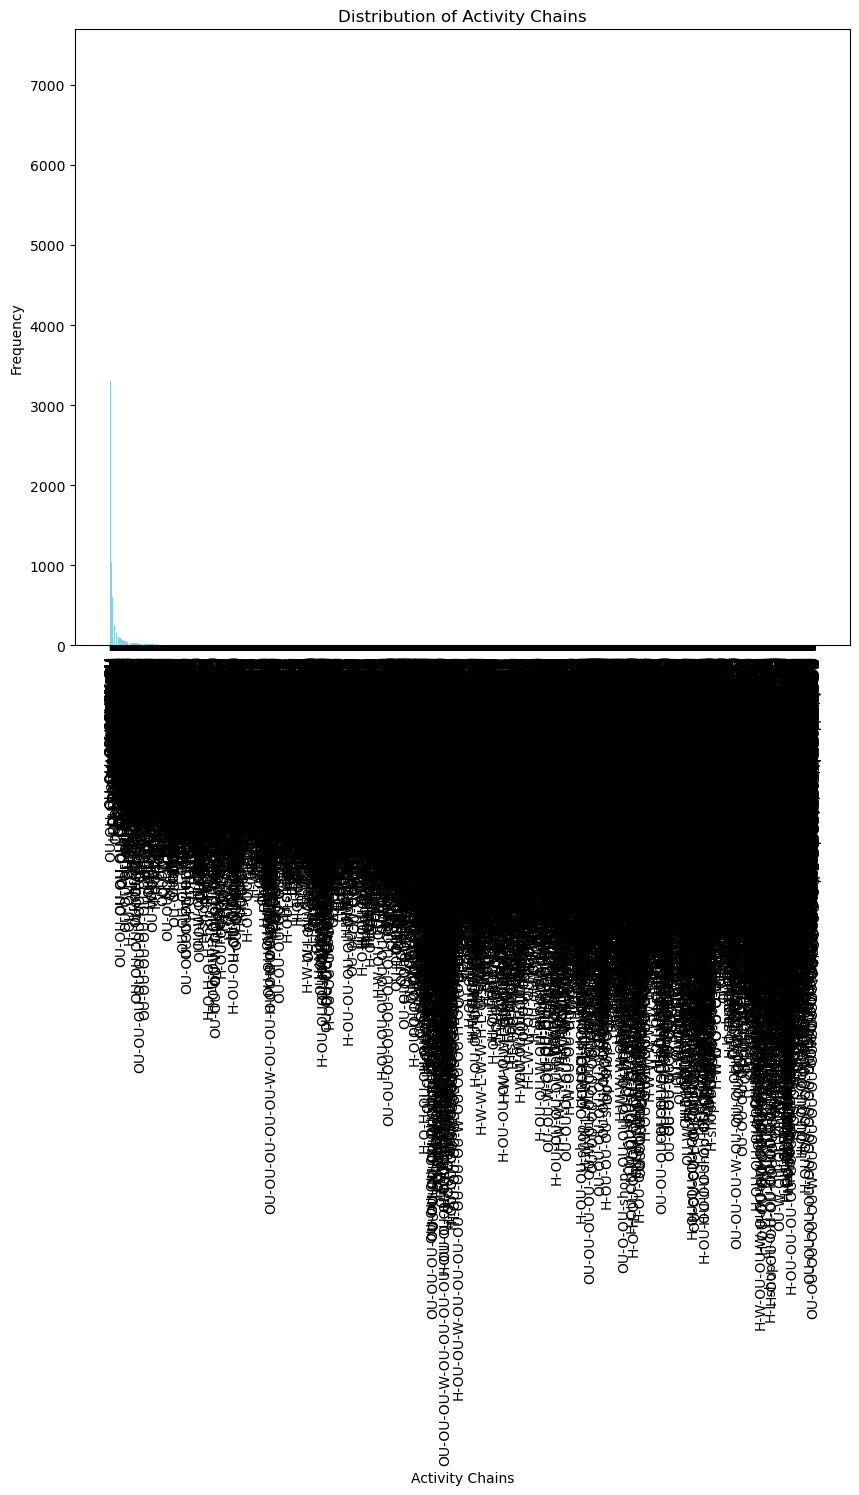

In [4]:
import gzip
import xml.etree.ElementTree as ET
from collections import Counter
import matplotlib.pyplot as plt

# Define a mapping for activity type substitution
ACTIVITY_CODE_MAPPING = {
    'home': 'H',
    'work': 'W',
    'outside': 'OU',
    'other': 'O',
    'leisure': 'L',
    'education': 'E',
    'freight_loading': 'FL',
    'freight_unloading': 'FU'
}

def extract_population_data(xml_content):
    tree = ET.ElementTree(ET.fromstring(xml_content))
    root = tree.getroot()

    person_ids = set()
    trip_type_distribution = Counter()
    activity_chain_distribution = Counter()

    for person in root.iter('person'):
        person_id = person.get('id')
        person_ids.add(person_id)

        activities = []
        for activity in person.iter('activity'):
            activity_type = activity.get('type')
            if activity_type != 'pt interaction':  # Exclude 'pt interaction'
                # Substitute activity types
                activities.append(ACTIVITY_CODE_MAPPING.get(activity_type, activity_type))

        activity_chain = '-'.join(activities)
        activity_chain_distribution[activity_chain] += 1

        for leg in person.iter('leg'):
            trip_type_distribution[leg.get('mode')] += 1

    return person_ids, trip_type_distribution, activity_chain_distribution

def process_gz_xml_file(filepath):
    with gzip.open(filepath, 'rt', encoding='utf-8') as f:
        xml_content = f.read()

    person_ids, trip_type_distribution, activity_chain_distribution = extract_population_data(xml_content)

    # Generate a bar graph for the activity chain distribution
    activity_chains = sorted(activity_chain_distribution.items(), key=lambda x: x[1], reverse=True)
    chains, counts = zip(*activity_chains)

    plt.figure(figsize=(10, 8))
    plt.bar(chains, counts, color='skyblue')
    plt.xlabel('Activity Chains')
    plt.ylabel('Frequency')
    plt.title('Distribution of Activity Chains')
    plt.xticks(rotation=90)  # Rotate x-axis labels to show them better
    plt.tight_layout()  # Adjust layout to fit all x-axis labels
    plt.show()

process_gz_xml_file('C:/Users/muaa/Documents/3_MIEI/2023_ABMT_Data/Zurich/10pct/zurich_population_10pct.xml.gz')